# Data formats and open data
**Exercises for week 5B** in Digital Methods, University of Copenhagen

## 1. HTML

HTML is the markup language used by web pages. It's ubiquitous on the web; even when editing this notebook you are interacting with HTML (right click and hit "View Page Source" if you need proof). Here follows some exercises to get you comfortable with navigating HTML on web pages.

> **Ex. 1**: Right click inside the cell below and hit "Inspect". This should launch the "Inspector" tool in your browser, showing you where the element that renders the cell sits inside the DOM.
1. How deeply is it nested? Are there any sibling elements?
2. What happens when you update it? Change the text and see for yourself.
>
> *Hint: Most modern browsers (e.g. Firefox, Chrome, Brave) will let you hover elements in the DOM to show where they display on the web page.*

*HTML is a beautiful soup of  dasdasj*

> **Ex. 2**: In the HTML code below:
1. What is typically the use of the `<p>`, `<h1>` and `<h2>` tags? Look them up, what are they for?
2. What are the attributes of the `div` element?
3. Create a text file that ends with ".html" and open it in a browser.

    <html>
    <body>

    <div width=200 height=100 id="main">
        <h1>This is the main title of the webpage</h1>
        <h2>This is a sub-heading</h2>
        <p>This is a paragraph of text.</p>
    </div>

    <h2>This is another sub-heading</h2>
    <p>This is a paragraph of text with some words in bold.</p>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
    <p>And that just above is an image.</p>

    </body>
    </html>


> **Ex. 3**: Using the `requests` module, download [this web page](https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1). Print the first 100 lines of the html string. How many lines are there in total?
>
> *Hint: use the `requests.get` method. To figure out how it works, execute `?requests.get` (after importing `requests`), this displays the module documentation.*

In [ ]:
import requests

?requests.get

In [ ]:
ur12l = requests.get("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1", params=None)
url122 = requests.get("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2", params=None)
url123 = requests.get("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=3", params=None)

In [ ]:
html_kode = bs(url.text, "html.parser")

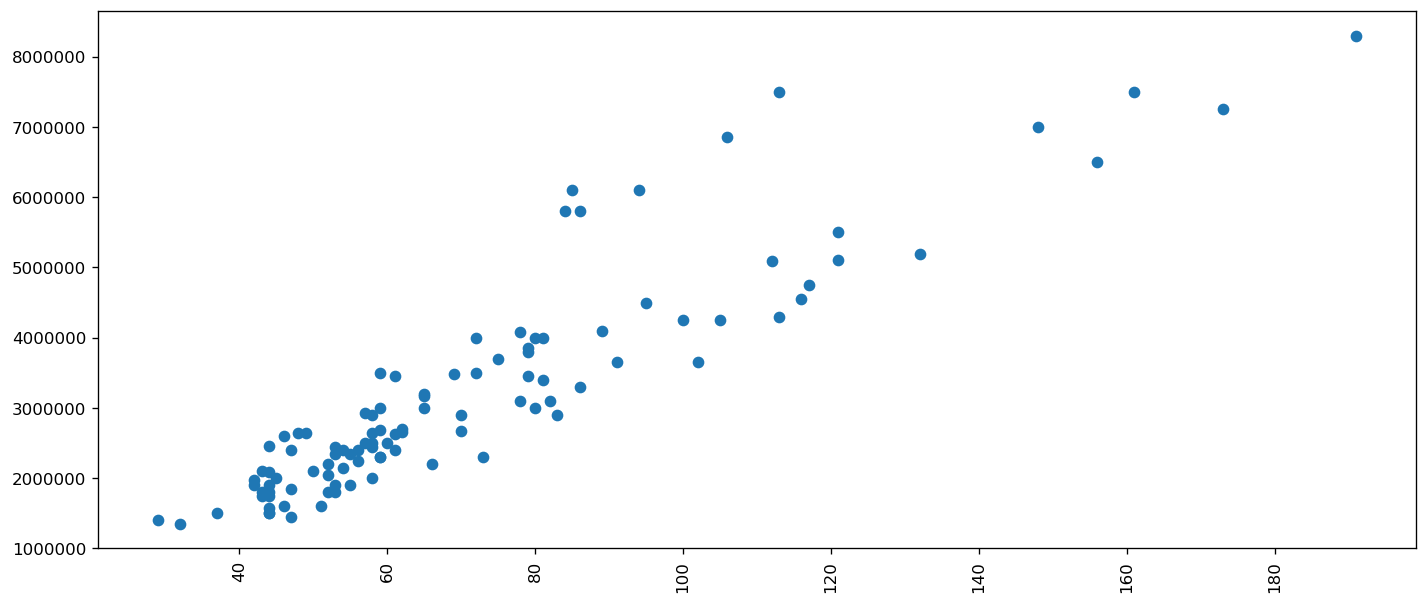

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress

def priser(hjemmeside):
    url = requests.get(hjemmeside, params=None)
    html_kode = bs(url.text, "html.parser")

    th_all = html_kode.find_all('app-listing-information-lg')
    pris1 = []
    for th in th_all:
        pris1.extend(th.find_all("div")[5])

    
    pris = (pris1[1:len(pris1):2])
    pris = [str(i) for i in pris]

    pattern = re.compile('\d.\d+.\d+')

    grisen = []
    for item in pris:
        grisen.extend(pattern.findall(item))
    
    grisen = [w.replace(".", "") for w in grisen]
    grisen = [float(i) for i in grisen ]
    del grisen[0:2]
   
    
    return grisen
    
priser_side_1 = priser("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1")
priser_side_2 = priser("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")
priser_side_3 = priser("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=3")

priser_side_1.extend(priser_side_2)

priser_side_1.extend(priser_side_3)

priser_norre = priser_side_1

def m2(hjemmeside):
    url = requests.get(hjemmeside, params=None)
    html_kode = bs(url.text, "html.parser")

    th_all = html_kode.find_all('app-house-details')
    m2_1 = []
    for th in th_all:
        m2_1.extend(th.find_all("span")[1])

    del m2_1[0:2]
    m2 = []
    for x in m2_1:
        m2.append(x[0:3])
    
    m2 = [float(i) for i in m2]
    
    return m2

m2_1 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1")
m2_2 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")
m2_3 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=3")
  
m2_1.extend(m2_2)

m2_1.extend(m2_3)

m2_norre = m2_1

plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(m2_norre, priser_norre)
plt.tight_layout()
plt.xticks(rotation=90)



plt.show()

In [12]:
from scipy.stats import linregress

print(linregress(m2_norre, priser_norre))
print(linregress(m2_frederiksberg, priser_frederiksberg))

LinregressResult(slope=46133.97255150055, intercept=-83538.69931026036, rvalue=0.9100762835086121, pvalue=8.27577889784665e-41, stderr=2080.201715151455)
LinregressResult(slope=40241.042376370046, intercept=340156.5053854827, rvalue=0.8304411329799026, pvalue=4.8488266829985946e-33, stderr=2434.1422249396473)


In [6]:
# side1: https://www.boliga.dk/resultat?propertyType=3&page=1&sort=zipCode-a&zipCodes=2000
# side2: https://www.boliga.dk/resultat?propertyType=3&page=2&sort=zipCode-a&zipCodes=2000
# side3: https://www.boliga.dk/resultat?propertyType=3&page=3&sort=zipCode-a&zipCodes=2000
        
priser_1 = priser("https://www.boliga.dk/resultat?propertyType=3&page=1&sort=zipCode-a&zipCodes=2000")
priser_2 = priser("https://www.boliga.dk/resultat?propertyType=3&page=2&sort=zipCode-a&zipCodes=2000")
priser_3 = priser("https://www.boliga.dk/resultat?propertyType=3&page=3&sort=zipCode-a&zipCodes=2000")

priser_1.extend(priser_2)

priser_1.extend(priser_3)

priser_frederiksberg = priser_1

m2_1 = m2("https://www.boliga.dk/resultat?propertyType=3&page=1&sort=zipCode-a&zipCodes=2000")
m2_2 = m2("https://www.boliga.dk/resultat?propertyType=3&page=2&sort=zipCode-a&zipCodes=2000")
m2_3 = m2("https://www.boliga.dk/resultat?propertyType=3&page=3&sort=zipCode-a&zipCodes=2000")

m2_1.extend(m2_2)
m2_1.extend(m2_3)

m2_frederiksberg = m2_1


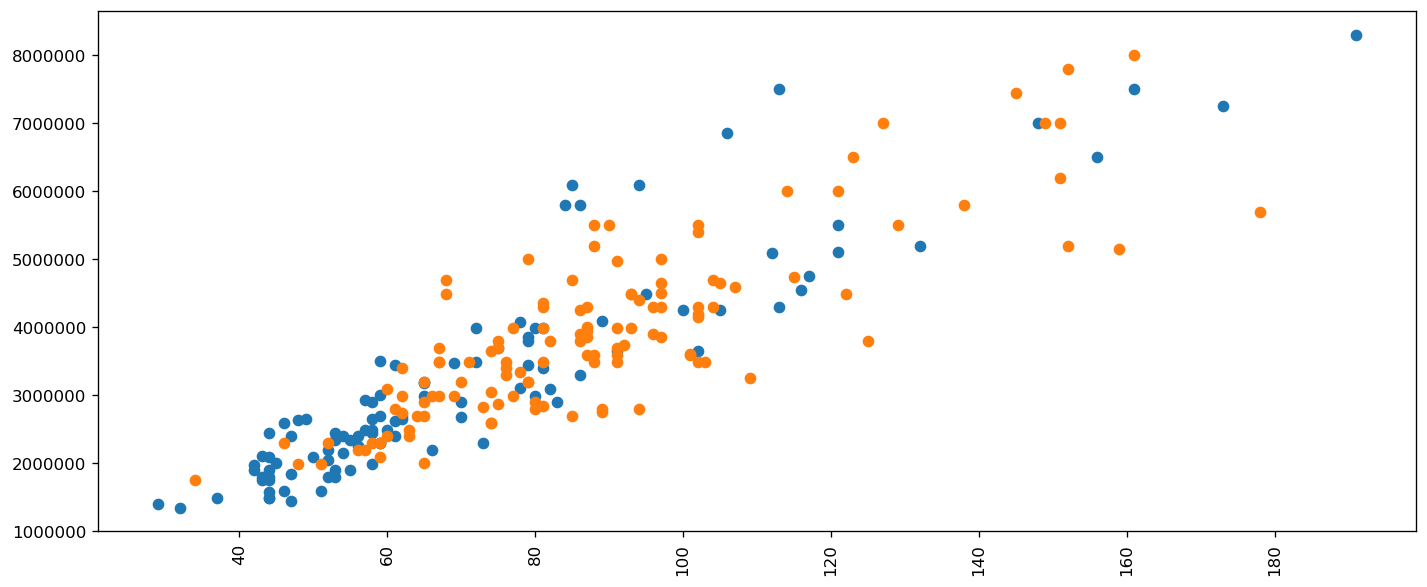

In [7]:
plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(m2_norre, priser_norre)
plt.tight_layout()
plt.xticks(rotation=90)


plt.scatter(m2_frederiksberg, priser_frederiksberg)
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

In [ ]:
pris = (pris1[1:len(pris1):2])
pris = [str(i) for i in pris]

In [ ]:
pattern = re.compile('\d.\d+.\d+')

prisen = []
for item in pris:
    prisen.extend(pattern.findall(item))
    
prisen = [w.replace(".", "") for w in prisen]
prisen = [float(i) for i in prisen ]
del prisen[0:2]

In [ ]:
def m2(hjemmeside):
    url = requests.get(hjemmeside, params=None)
    html_kode = bs(url.text, "html.parser")

    th_all = html_kode.find_all('app-house-details')
    m2_1 = []
    for th in th_all:
        m2_1.extend(th.find_all("span")[1])

    del m2_1[0:2]
    m2 = []
    for x in m2_1:
        m2.append(x[0:2])
    
    m2 = [float(i) for i in m2]
    
    return m2

m2_1 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1")
m2_2 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")
m2_3 = m2("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=3")
  
m2_1.extend(m2_2)

m2_1.extend(m2_3)

m2 = m2_1






In [ ]:
priser_side_2 = priser("https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=2")

In [ ]:
len(priser_side_1)

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
pris1 = []
for th in th_all:
    pris1.extend(th.find_all("div")[5])
    
th_all2 = html_soup.find_all('app-house-details')
m2_1 = []
for th in th_all4:
    m2_1.extend(th.find_all("span")[1])




    


In [ ]:
del m2_1[0:2]

In [ ]:
del m2_1[0:2]
m2 = []
for x in m2_1:
    m2.append(x[0:2])
m2 = [float(i) for i in m2]

In [ ]:
m2 = [float(i) for i in m2]

In [ ]:
linregress(m2,prisen)

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(m2, prisen)
plt.tight_layout()
plt.xticks(rotation=90)
linregress(m2, prisen)


plt.show()

In [ ]:
pris = (pris1[1:len(pris1):2])

In [ ]:
pris = [str(i) for i in pris]

In [ ]:
import re

pattern = re.compile('\d.\d+.\d+')

prisen = []
for item in pris:
    prisen.extend(pattern.findall(item))
    
prisen = [w.replace(".", "") for w in prisen]


In [ ]:
prisen = [float(i) for i in prisen ]

In [ ]:
len(prisen)

In [ ]:
import re

pattern = re.compile('\d.\d+.')

In [ ]:
from bs4 import BeautifulSoup as bs

html_soup = BeautifulSoup(url.text, "html.parser")
html_soup2 = BeautifulSoup(url2.text, "html.parser")
html_soup3 = BeautifulSoup(url3.text, "html.parser")

th_all = html_soup.find_all('app-listing-information-lg')
pris1 = []
for th in th_all:
    pris1.extend(th.find_all("div")[5])

th_all2 = html_soup2.find_all('app-listing-information-lg')
pris2 = []
for th in th_all2:
    pris2.extend(th.find_all("div")[5])
    
th_all3 = html_soup3.find_all('app-listing-information-lg')
pris3 = []
for th in th_all3:
    pris3.extend(th.find_all("div")[5])
    
del(pris1[0:104:2])   
del(pris2[0:104:2])    
del(pris3[0:104:2]) 
    
pris1 = [str(i) for i in pris1]
pris2 = [str(i) for i in pris2]
pris3 = [str(i) for i in pris3]

ny_pris1 = []
for x in pris1:
    ny_pris1.append(x[1:10])
    
ny_pris2 = []
for x in pris2:
    ny_pris2.append(x[1:10])
    
ny_pris3 = []
for x in pris3:
    ny_pris3.append(x[1:10])

ny_pris1.extend(ny_pris2)
ny_pris1.extend(ny_pris3)
    
prisen = [w.replace(".", "") for w in ny_pris1]
prisen = [float(i) for i in prisen]




In [ ]:
from bs4 import BeautifulSoup


html_soup2 = BeautifulSoup(url2.text, "html.parser")


th_all2 = html_soup2.find_all('app-listing-information-lg')
pris2 = []
for th in th_all2:
    pris2.extend(th.find_all("div")[5])
    
del(pris2[0:104:2])    

    

pris2 = [str(i) for i in pris2]
    
ny_pris2 = []
for x in pris2:
    ny_pris2.append(x[1:10])

    
prisen = [w.replace(".", "") for w in ny_pris2]
prisen2 = [float(i) for i in prisen]



In [ ]:
from bs4 import BeautifulSoup


html_soup = BeautifulSoup(url.text, "html.parser")


th_all = html_soup.find_all('app-listing-information-lg')
pris1 = []
for th in th_all:
    pris1.extend(th.find_all("div")[5])
    
del(pris1[0:104:2])    

    

pris1 = [str(i) for i in pris1]
    
ny_pris1 = []
for x in pris1:
    ny_pris1.append(x[1:10])

    
prisen = [w.replace(".", "") for w in ny_pris1]
prisen1 = [float(i) for i in prisen]


In [ ]:
from bs4 import BeautifulSoup


html_soup3 = BeautifulSoup(url3.text, "html.parser")


th_all3 = html_soup.find_all('app-listing-information-lg')
pris3 = []
for th in th_all:
    pris3.extend(th.find_all("div")[5])
    
del(pris3[0:104:2])    

    

pris3 = [str(i) for i in pris3]
    
ny_pris3 = []
for x in pris3:
    ny_pris3.append(x[1:10])

    
prisen = [w.replace(".", "") for w in ny_pris3]
prisen3 = [float(i) for i in prisen]

In [ ]:
 th_all4 = html_soup.find_all('app-house-details')
m2_1 = []
for th in th_all4:
    m2_1.extend(th.find_all("span")[1])
    



m2_11 = []
for x in m2_1:
    m2_11.append(x[0:3])


m2 = m2_11


m2_1 = [float(i) for i in m2]

In [ ]:
del m2_1[0:2]
del prisen1[0:2]

In [ ]:
 th_all5 = html_soup2.find_all('app-house-details')
m2_2 = []
for th in th_all5:
    m2_2.extend(th.find_all("span")[1])
    



m2_12 = []
for x in m2_2:
    m2_12.append(x[0:3])


m2 = m2_12


m2_2 = [float(i) for i in m2]

In [ ]:
 th_all6 = html_soup3.find_all('app-house-details')
m2_3 = []
for th in th_all6:
    m2_3.extend(th.find_all("span")[1])
    



m2_13 = []
for x in m2_3:
    m2_13.append(x[0:3])


m2 = m2_13


m2_3 = [float(i) for i in m2]

In [ ]:


dic1 = dict(zip(m2_1, prisen1))
dic2 = dict(zip(m2_2, prisen2))
# dic3 = dict(zip(m2_3, prisen3))

In [ ]:
m2_3

In [ ]:
dic1.update(dic2)

In [ ]:
dic1.update(dic3)

In [ ]:
prisen3

In [ ]:
keys = list(dic1.keys())
values = list(dic1.values())
(keys,values) = zip(*dic1.items())

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(keys, values)
plt.tight_layout()
plt.xticks(rotation=90)


plt.show()

In [ ]:
 th_all4 = html_soup2.find_all('app-house-details')
m2_2 = []
for th in th_all5:
    m2_2.extend(th.find_all("span")[1])
    



m2_12 = []
for x in m2_2:
    m2_12.append(x[0:3])


m2 = m2_12


m2_1 = [float(i) for i in m2]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(m2, prisen)
plt.tight_layout()
plt.xticks(rotation=90)


plt.show()

In [ ]:
th_all4 = html_soup.find_all('app-house-details')
m2_1 = []
for th in th_all4:
    m2_1.extend(th.find_all("span")[1])
    
th_all5 = html_soup2.find_all('app-house-details')
m2_2 = []
for th in th_all5:
    m2_2.extend(th.find_all("span")[1])
    
th_all6 = html_soup3.find_all('app-house-details')
m2_3 = []
for th in th_all6:
    m2_1.extend(th.find_all("span")[1])
    
m2_11 = []
for x in m2_1:
    m2_11.append(x[0:3])  

m2_12 = []
for x in m2_2:
    m2_12.append(x[0:3])

m2_13 = []
for x in m2_3:
    m2_13append(x[0:3])

m2 = m2_11

m2.extend(m2_12)
m2.extend(m2_13)

m2 = [float(i) for i in m2]

In [ ]:
m2

In [ ]:
m2

In [ ]:
prisen

In [ ]:
m2[99]

In [ ]:
prisen[99]

In [ ]:
prisen.index(6095000.0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi= 120)
plt.scatter(m2, prisen)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


plt.show()

In [ ]:
html_soup = BeautifulSoup(url.text, "html.parser")


In [ ]:
text_bolig = html_soup.find_all("p")

In [ ]:
text_bolig[0:100]

In [ ]:
len(text_bolig)

## 1.2 Scraping

*Scraping* means to parse HTML and collect the important pieces of information inside. *Crawling* is
another important contect, and the word refers to automatically sifting through pages of the web and scraping
information on each page. 90% of scraping and crawling work can be done using the two modules `requests` and
`BeautifulSoup`.

> **Ex. 4:** Load the toy example HTML with BeautifulSoup. Use the [documentation page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for reference on how to do this.
1. Access the `h1` element inside the `div` and print out its content (which is "This is the main title of the webpage").
2. Get the value of the `src` attribute inside the `img` element.
3. Get the second subheading that contains "This is another sub-heading" and print out that content.
4. Get the `div` element by searching for its id.

In [ ]:
from bs4 import BeautifulSoup

with open("toy example.html") as fp:
    soup = BeautifulSoup(fp, "html.parser")



In [ ]:
type(soup)

In [ ]:
soup.img["src"]

In [ ]:
soup.find_all("h2")[1]

In [ ]:
html_soup.find_all("div")[1]

In [ ]:
soup.find(id="main")

> **Ex. 5** Load the HTML you downloaded in Ex. 3. For each post, extract price, square meter size and "Ejerudgift". You should create three different lists that contain each variable across posts.

In [ ]:
%pprint

In [ ]:
ny = html_soup.find_all("a")

In [ ]:
tag = html_soup.b

In [ ]:
tag.name

In [ ]:
h = html_soup.find_all("app-housing-list-item")

In [ ]:
y = html_soup.find_all("app-listing-information-lg")

In [ ]:
l = html_soup.find_all()

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
result = []
for th in th_all:
    result.extend(th.find_all("p"))

In [ ]:
result

In [ ]:
p = html_soup.find("kr" )

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
result = []
for th in th_all:
    result.extend(th.find_all("p"))

In [ ]:
result

In [ ]:
y2 = html_soup.find_all("p")

In [ ]:
html_soup.find_all("$0")

In [ ]:
result

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
result = []
for th in th_all:
    result.extend(th.find_all("div")[5])

In [ ]:
result

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
pris = []
for th in th_all:
    pris.extend(th.find_all("div")[5])

In [ ]:
th_allll = html_soup.find_all('app-listing-information-lg')
pris = []
for th in th_allll:
    pris.extend(th.find_allll("div")[5])

In [ ]:
del(pris[0:104:2])

In [ ]:
pris

In [ ]:
pris = [str(i) for i in pris]

In [ ]:
pris2 = []
for x in pris:
    pris2.append(x[1:10])

In [ ]:
prisen = [w.replace(".", "") for w in pris2]

In [ ]:
prisen = [float(i) for i in prisen]

In [ ]:
prisen

In [ ]:
del result4[0:2]

In [ ]:
result4 = [str(i) for i in result4]

In [ ]:
result4

In [ ]:
import re
pattern=re.compile('\d.\d+')

result2 = []
for item in result4:
    result2.extend(pattern.findall(item))
    
    

In [ ]:
result2 = [float(i) for i in result2]

In [ ]:
result2

In [ ]:
th_allll = html_soup.find_all('app-house-details')
result4 = []
for th in th_all2:
    result4.extend(th.find_all("span")[-1])
    
result4

In [ ]:
result4

In [ ]:
result3

In [ ]:
m = html_soup.find_all("app-house-details")

In [ ]:
result3

In [ ]:
m2 = []
for x in result3:
    m2.append(x[0:2])

In [ ]:
len(square_meter_price)

In [ ]:
m2 = [float(i) for i in m2]

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(square_meter_price, result2)
plt.tight_layout()
plt.xticks(rotation=90)



plt.show()

In [ ]:
result2

In [ ]:
del(result[0:104:2])

In [ ]:
result

In [ ]:
result = [str(i) for i in result]

In [ ]:
result = [for i ]

In [ ]:
th_all = html_soup.find_all('app-listing-information-lg')
result2 = []
for th in th_all:
    result2.extend(th.find_all("div")[4][-1:-20])

In [ ]:
result2

In [ ]:
del(result[1:104:2])

In [ ]:
result

In [ ]:
paragraphs = []
for x in result:
    paragraphs.append(x[1:10])

In [ ]:
paragraphs 

In [ ]:
result[1].attrs

In [ ]:
import re
for i in paragraphs:
    r1 = re.findall(r"\d+",i)
print(r1)

In [ ]:
h[1].index("Ejerudgift")

In [ ]:
dictionary1 = dict(zip(m2, prisen))

In [ ]:
dictionary

In [ ]:
house_list_item = html_soup.find_all("a", {"class":"house-list-item"})

In [ ]:
i = html_soup.find_all("div", {"class":"house-list-item"})

In [ ]:
square_meter_price

In [ ]:
len(m2_1)

In [ ]:
len(square_meter_price)

In [ ]:

square_meter_price = [(b) / (m) for b,m in zip(prisen1, m2_1)]
square_meter_price
    
    

In [ ]:
len(square_meter_price)

In [ ]:
house_list_item.index("Ejerudgift")

In [ ]:
len()

> **Ex. 6:** Make a scatter plot of square meter size vs. extracted price. Then make a new variable that 
measures price per square meter and scatter plot this against "Ejerudgift". Can you say anything about how
"Ejerudgift" influences square meter price?

> **Supercharge:** Crawl over pages of Boliga to collect this data for the entire borough of Nørrebro. Or all of Copenhagen!